# **AgroVision - A Comparitive Study of CNN Models for Plant Disease Prediction**

<div style="text-align: justify;font-style:italic">
    <p>
        "AgroVision" conducts a comparative analysis of five CNN models—Xception, ResNet50, AlexNet, DenseNet201, and EfficientNetB0—for plant leaf disease detection.

The study likely involves training each model on a dataset containing images of various plant diseases and healthy plants, then evaluating their performance on a separate test dataset. Metrics such as accuracy, precision, recall, and F1 score may be used to assess the models' performance.

By evaluating these models, the study aims to determine the most effective architecture for accurately identifying and classifying plant diseases from images. This research contributes to the development of efficient automated systems for plant disease diagnosis, crucial for ensuring sustainable agriculture practices.
    </p>
</div>

<h3 id="toc"><b>Table of Contents</b></h3>

1. **Xception**
    * [Building of model](#xcepbuild)
    * [Training of model](#xceptrain) 
    * [Evaluation of model](#xcepeval)
2. **ResNet50**
    * [Building of model](#resbuild)
    * [Training of model](#restrain)
    * [Evaluation of model](#reseval)
3. **DenseNet201**
    * [Building of model](#denbuild)
    * [Training of model](#dentrain)
    * [Evaluation of model](#deneval)
4. **EfficientNetB0**
    * [Building of model](#effbuild)
    * [Training of model](#efftrain)
    * [Evaluation of model](#effeval)
5. **AlexNet**
    * [Building of model](#alexbuild)
    * [Training of model](#alextrain)
    * [Evaluation of model](#alexeval)

<h3><b>Importing required dependencies</b></h3>

In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle #for saving history object
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications.xception import preprocess_input  # Adjusted import for Xception

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model

from tensorflow.keras.applications import DenseNet201 

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

<h3><b>Data Preprocessing</b></h3>

In [ ]:
train_dir = 'D:/testproject/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
val_dir = 'D:/testproject/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_dir = 'D:/testproject/New Plant Diseases Dataset(Augmented)/test/test'

(256, 256, 3)


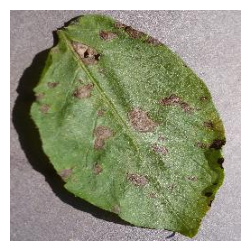

In [ ]:
image_path = r'D:\testproject\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Potato___Early_blight\b549ab3b-06f1-45ef-bf34-86071552d870___RS_Early.B 8576_180deg.JPG'

# Read the image
img = plt.imread(image_path)

print(img.shape)
plt.figure(figsize=(3,3))
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = r'D:\testproject\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Potato___Early_blight\b549ab3b-06f1-45ef-bf34-86071552d870___RS_Early.B 8576_180deg.JPG'

# Read the image
img = plt.imread(image_path)

print(img)

[[[145 134 138]
  [147 136 140]
  [153 142 146]
  ...
  [197 191 193]
  [197 191 193]
  [193 187 189]]

 [[162 151 155]
  [152 141 145]
  [141 130 134]
  ...
  [177 171 173]
  [178 172 174]
  [180 174 176]]

 [[151 140 144]
  [145 134 138]
  [141 130 134]
  ...
  [180 174 176]
  [185 179 181]
  [190 184 186]]

 ...

 [[125 119 123]
  [129 123 127]
  [131 125 129]
  ...
  [192 187 193]
  [195 190 196]
  [202 197 203]]

 [[127 121 125]
  [135 129 133]
  [134 128 132]
  ...
  [180 175 181]
  [188 183 189]
  [188 183 189]]

 [[127 121 125]
  [147 141 145]
  [150 144 148]
  ...
  [177 172 178]
  [191 186 192]
  [189 184 190]]]


<h3><b>Splitting of Data for Train, Validation & Test</b></h3>

In [ ]:
#Train parameters
epochs = 20
patience = 5
batch_size = 16

In [ ]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input  
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input 
)


Found 12750 images belonging to 17 classes.
Found 7809 images belonging to 17 classes.
Found 468 images belonging to 17 classes.


<a id="xcepbuild"></a>
<h3><b>Building the Xception Model</b></h3>

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3)) 

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

<a id="xceptrain"></a>
<h3><b>Training of Xception Model</b></h3>

In [ ]:
# Define callbacks
checkpoint = ModelCheckpoint('models/xception_plant_disease_detection[25-02-2024].h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping] 
)
# Save history object
with open('history[xception02042024].pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Load history object
with open('history[xception02042024].pkl', 'rb') as f:
    loaded_history = pickle.load(f)

Epoch 1/20
796/796 [==============================] - ETA: 0s - loss: 1.0814 - accuracy: 0.6561
Epoch 1: val_accuracy improved from -inf to 0.88051, saving model to models\xception_plant_disease_detection[02-04-2024].h5
796/796 [==============================] - 313s 381ms/step - loss: 1.0814 - accuracy: 0.6561 - val_loss: 0.3755 - val_accuracy: 0.8805
Epoch 2/20
796/796 [==============================] - ETA: 0s - loss: 0.6477 - accuracy: 0.7900
Epoch 2: val_accuracy improved from 0.88051 to 0.88384, saving model to models\xception_plant_disease_detection[02-04-2024].h5
796/796 [==============================] - 293s 367ms/step - loss: 0.6477 - accuracy: 0.7900 - val_loss: 0.3738 - val_accuracy: 0.8838
Epoch 3/20
796/796 [==============================] - ETA: 0s - loss: 0.5370 - accuracy: 0.8222
Epoch 3: val_accuracy improved from 0.88384 to 0.88781, saving model to models\xception_plant_disease_detection[02-04-2024].h5
796/796 [==============================] - 295s 370ms/step - los

<a id="xcepeval"></a>
<h3><b>Evaluation of Xception Model</b></h3>

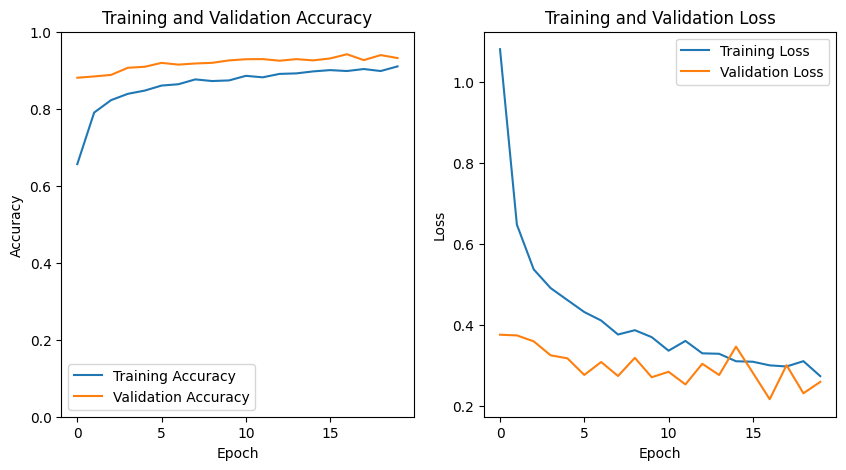

In [ ]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(loaded_history['loss'], label='Training Loss')
#plt.plot(history.history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

30/30 [==============================] - 9s 266ms/step
There were 27 errors in 468 tests for an accuracy of 94.23


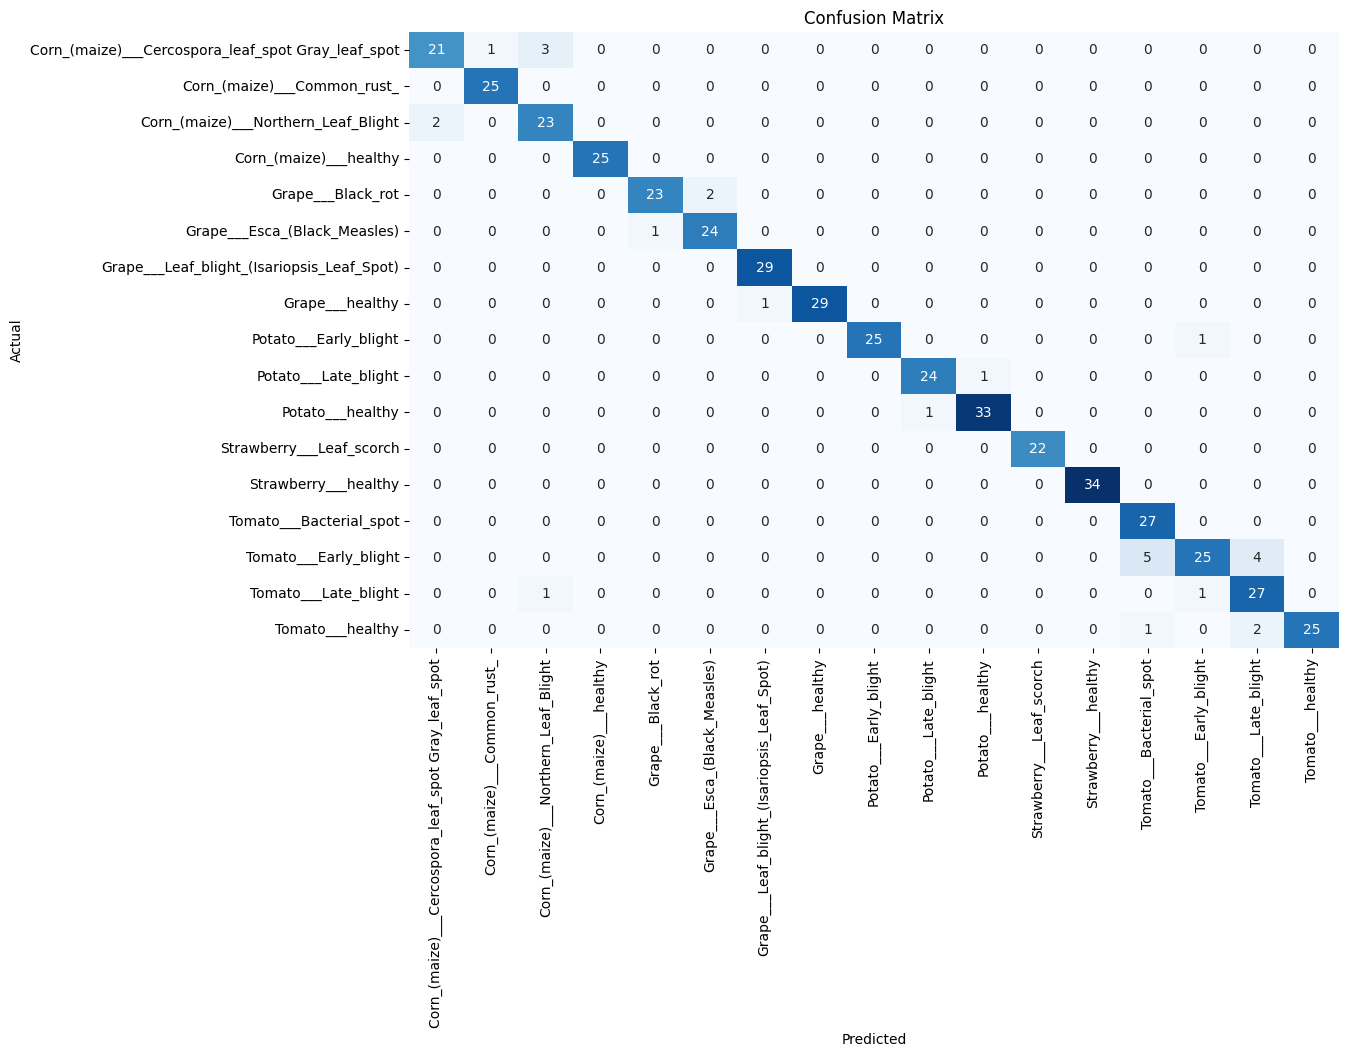

Classification Report:
----------------------
                                                     precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     0.9130    0.8400    0.8750        25
                       Corn_(maize)___Common_rust_     0.9615    1.0000    0.9804        25
               Corn_(maize)___Northern_Leaf_Blight     0.8519    0.9200    0.8846        25
                            Corn_(maize)___healthy     1.0000    1.0000    1.0000        25
                                 Grape___Black_rot     0.9583    0.9200    0.9388        25
                      Grape___Esca_(Black_Measles)     0.9231    0.9600    0.9412        25
        Grape___Leaf_blight_(Isariopsis_Leaf_Spot)     0.9667    1.0000    0.9831        29
                                   Grape___healthy     1.0000    0.9667    0.9831        30
                             Potato___Early_blight     1.0000    0.9615    0.9804        26
                              Po

In [ ]:
def predictor(test_gen):    
    y_pred = []
    error_list = []
    error_pred_list = []
    y_true = test_gen.labels
    classes = list(test_gen.class_indices.keys())
    class_count = len(classes)
    errors = 0
    preds = model.predict(test_gen, verbose=1)
    tests = len(preds)    
    for i, p in enumerate(preds):        
        pred_index = np.argmax(p)         
        true_index = test_gen.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors = errors + 1
            file = test_gen.filenames[i]
            error_list.append(file)
            error_class = classes[pred_index]
            error_pred_list.append(error_class)
        y_pred.append(pred_index)
            
    acc = (1 - errors/tests) * 100
    msg = f'There were {errors} errors in {tests} tests for an accuracy of {acc:.2f}'
    print(msg)
    
    ypred = np.array(y_pred)
    ytrue = np.array(y_true)
    f1score = f1_score(ytrue, ypred, average='weighted') * 100
    if class_count <= 30:
        cm = confusion_matrix(ytrue, ypred)
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count) + .5, classes, rotation=90)
        plt.yticks(np.arange(class_count) + .5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    
    clr = classification_report(y_true, y_pred, target_names=classes, digits=4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    
    return errors, tests, error_list, error_pred_list, f1score, y_pred, y_true

errors, tests, error_list, error_pred_list, f1score, y_pred, y_true = predictor(test_generator)

In [ ]:
# Evaluate the model on test generator
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)


30/30 [==============================] - 7s 236ms/step - loss: 0.1509 - accuracy: 0.9423
Test Accuracy: 0.942307710647583
Test Loss: 0.15085941553115845


<a id="resbuild"></a>
<h3><b>Building the ResNet50 Model</b></h3>

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<a id="restrain"></a>
<h3><b>Training of ResNet50 Model</b></h3>

In [ ]:
#Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
callbacks = [early_stopping]

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=callbacks
)
# Save history object
with open('history[resnet_history].pkl', 'wb') as f:
     pickle.dump(history.history, f)
#Load history object
with open('history[resnet_history].pkl', 'rb') as f:
    loaded_history = pickle.load(f)

Epoch 1/8


796/796 [==============================] - 3048s 4s/step - loss: 0.3048 - accuracy: 0.9035 - val_loss: 0.2792 - val_accuracy: 0.9159
Epoch 2/8
796/796 [==============================] - 3022s 4s/step - loss: 0.1282 - accuracy: 0.9542 - val_loss: 0.1378 - val_accuracy: 0.9574
Epoch 3/8
796/796 [==============================] - 3361s 4s/step - loss: 0.1151 - accuracy: 0.9587 - val_loss: 0.1215 - val_accuracy: 0.9612
Epoch 4/8
796/796 [==============================] - 3297s 4s/step - loss: 0.0943 - accuracy: 0.9660 - val_loss: 0.1865 - val_accuracy: 0.9499
Epoch 5/8
796/796 [==============================] - 36570s 46s/step - loss: 0.0908 - accuracy: 0.9686 - val_loss: 0.1108 - val_accuracy: 0.9696
Epoch 6/8
796/796 [==============================] - 3028s 4s/step - loss: 0.0766 - accuracy: 0.9732 - val_loss: 0.1360 - val_accuracy: 0.9656
Epoch 7/8
796/796 [==============================] - 3987s 5s/step - loss: 0.0699 - accuracy: 0.9761 - val_loss: 0.1377 - val_accuracy: 0.

<a id="reseval"></a>
<h3><b>Evaluation of ResNet50 Model</b></h3>

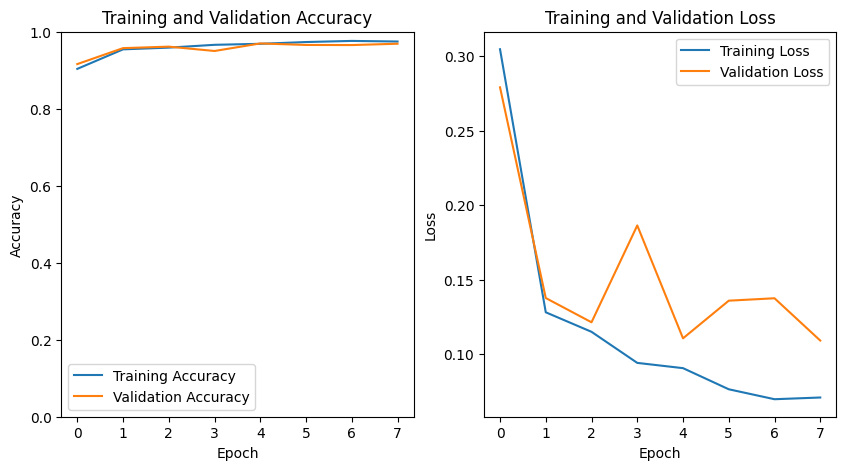

In [ ]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(loaded_history['loss'], label='Training Loss')
#plt.plot(history.history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

22/22 [==============================] - 65s 2s/step
There were 329 errors in 338 tests for an accuracy of 2.66


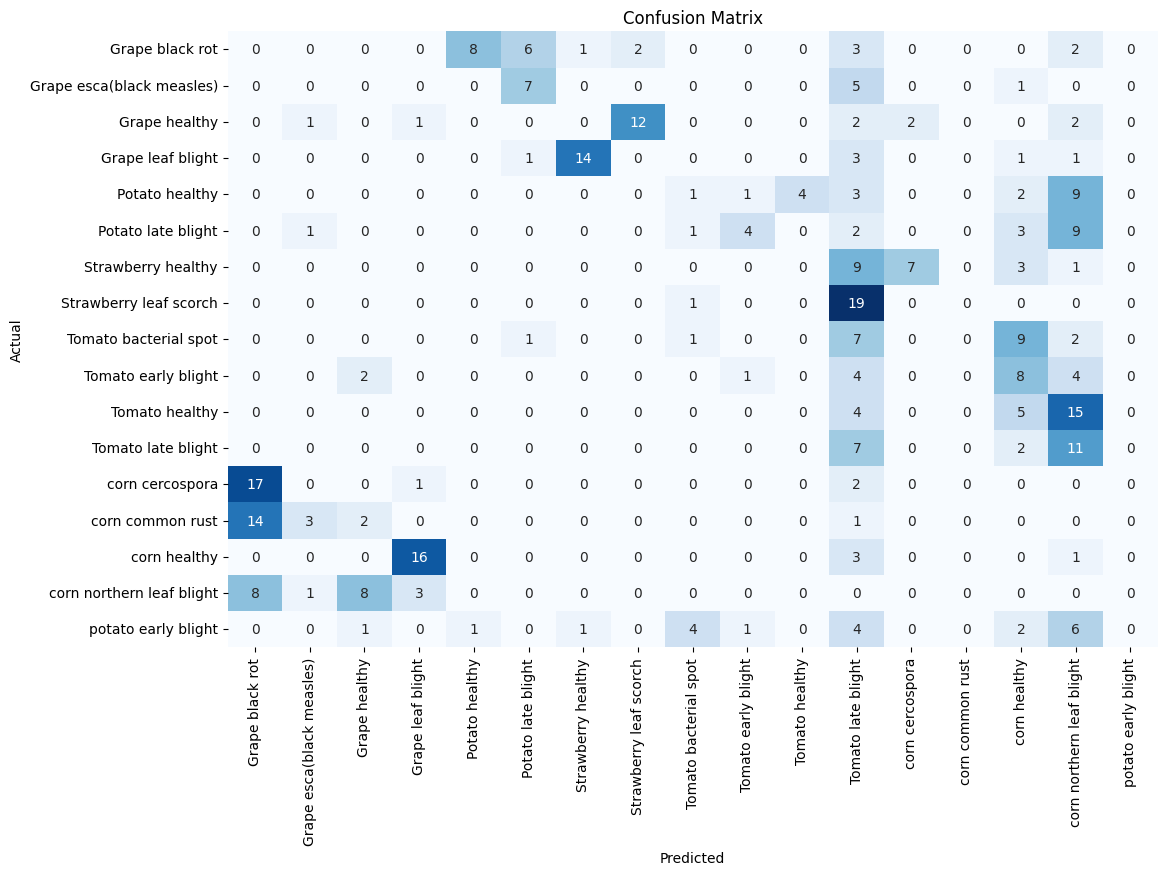

Classification Report:/n----------------------/n                            precision    recall  f1-score   support

          Grape black rot     0.0000    0.0000    0.0000        22
Grape esca(black measles)     0.0000    0.0000    0.0000        13
            Grape healthy     0.0000    0.0000    0.0000        20
        Grape leaf blight     0.0000    0.0000    0.0000        20
           Potato healthy     0.0000    0.0000    0.0000        20
       Potato late blight     0.0000    0.0000    0.0000        20
       Strawberry healthy     0.0000    0.0000    0.0000        20
   Strawberry leaf scorch     0.0000    0.0000    0.0000        20
    Tomato bacterial spot     0.1250    0.0500    0.0714        20
      Tomato early blight     0.1429    0.0526    0.0769        19
           Tomato healthy     0.0000    0.0000    0.0000        24
       Tomato late blight     0.0897    0.3500    0.1429        20
          corn cercospora     0.0000    0.0000    0.0000        20
         cor

C:\Users\91799\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91799\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91799\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [ ]:
def predictor(test_gen):    
    y_pred = []
    error_list = []
    error_pred_list = []
    y_true = test_gen.labels
    classes = list(test_gen.class_indices.keys())
    class_count = len(classes)
    errors = 0
    preds = model.predict(test_gen, verbose=1)
    tests = len(preds)    
    for i, p in enumerate(preds):        
        pred_index = np.argmax(p)         
        true_index = test_gen.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors = errors + 1
            file = test_gen.filenames[i]
            error_list.append(file)
            error_class = classes[pred_index]
            error_pred_list.append(error_class)
        y_pred.append(pred_index)
            
    acc = (1 - errors/tests) * 100
    msg = f'There were {errors} errors in {tests} tests for an accuracy of {acc:.2f}'
    print(msg)
    
    ypred = np.array(y_pred)
    ytrue = np.array(y_true)
    f1score = f1_score(ytrue, ypred, average='weighted') * 100
    if class_count <= 30:
        cm = confusion_matrix(ytrue, ypred)
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count) + .5, classes, rotation=90)
        plt.yticks(np.arange(class_count) + .5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    
    clr = classification_report(y_true, y_pred, target_names=classes, digits=4) # create classification report
    print("Classification Report:/n----------------------/n", clr)
    
    return errors, tests, error_list, error_pred_list, f1score, y_pred, y_true

errors, tests, error_list, error_pred_list, f1score, y_pred, y_true = predictor(test_generator)      
        


In [ ]:
# Evaluate the model on test generator
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

22/22 [==============================] - 48s 2s/step - loss: 19.4445 - accuracy: 0.0266
Test Accuracy: 0.02662721835076809
Test Loss: 19.44451332092285


<a id="denbuild"></a>
<h3><b>Building the DenseNet201 Model</b></h3>

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

In [ ]:
# Build the model
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


<a id="dentrain"></a>
<h3><b>Training of DenseNet201 Model</b></h3>

In [ ]:
# Define callbacks
checkpoint = ModelCheckpoint('plant_disease_detection_densenet.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)
# Save history object
with open('history[densenet20108042024].pkl', 'wb') as f:
    pickle.dump(history.history, f)
# Load history object
with open('history[densenet20108042024].pkl', 'rb') as f:
    loaded_history = pickle.load(f)

Epoch 1/15
796/796 [==============================] - ETA: 0s - loss: 2.4032 - accuracy: 0.3151
Epoch 1: val_accuracy improved from -inf to 0.58120, saving model to models\densenet201_plant_disease_detection[08-04-2024_10-04-26].h5


C:\Users\ASUS LAPTOP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


796/796 [==============================] - 1486s 2s/step - loss: 2.4032 - accuracy: 0.3151 - val_loss: 1.0772 - val_accuracy: 0.5812
Epoch 2/15
796/796 [==============================] - ETA: 0s - loss: 1.7361 - accuracy: 0.3665
Epoch 2: val_accuracy improved from 0.58120 to 0.66009, saving model to models\densenet201_plant_disease_detection[08-04-2024_10-04-26].h5
796/796 [==============================] - 1407s 2s/step - loss: 1.7361 - accuracy: 0.3665 - val_loss: 0.9049 - val_accuracy: 0.6601
Epoch 3/15
796/796 [==============================] - ETA: 0s - loss: 1.6352 - accuracy: 0.3889
Epoch 3: val_accuracy improved from 0.66009 to 0.79841, saving model to models\densenet201_plant_disease_detection[08-04-2024_10-04-26].h5
796/796 [==============================] - 1393s 2s/step - loss: 1.6352 - accuracy: 0.3889 - val_loss: 0.7041 - val_accuracy: 0.7984
Epoch 4/15
796/796 [==============================] - ETA: 0s - loss: 1.6163 - accuracy: 0.4113
Epoch 4: val_accuracy did not impro

<a id="deneval"></a>
<h3><b>Evaluation of DenseNet201 Model</b></h3>

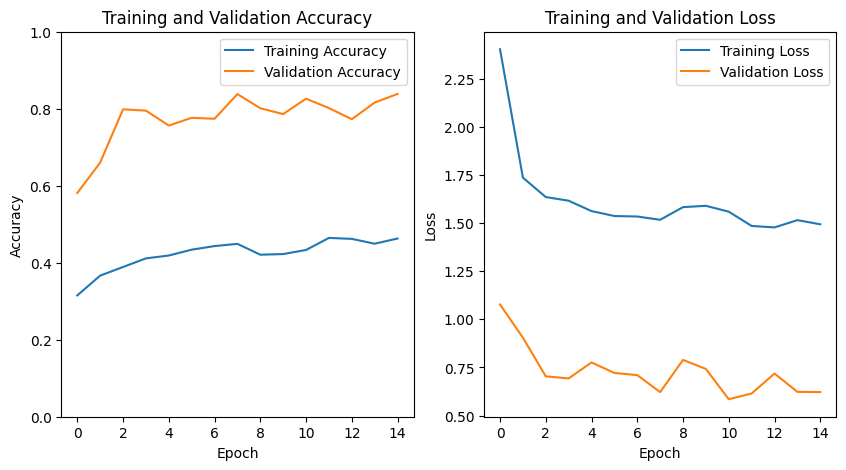

In [ ]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

22/22 [==============================] - 35s 1s/step
There were 209 errors in 338 tests for an accuracy of 38.17


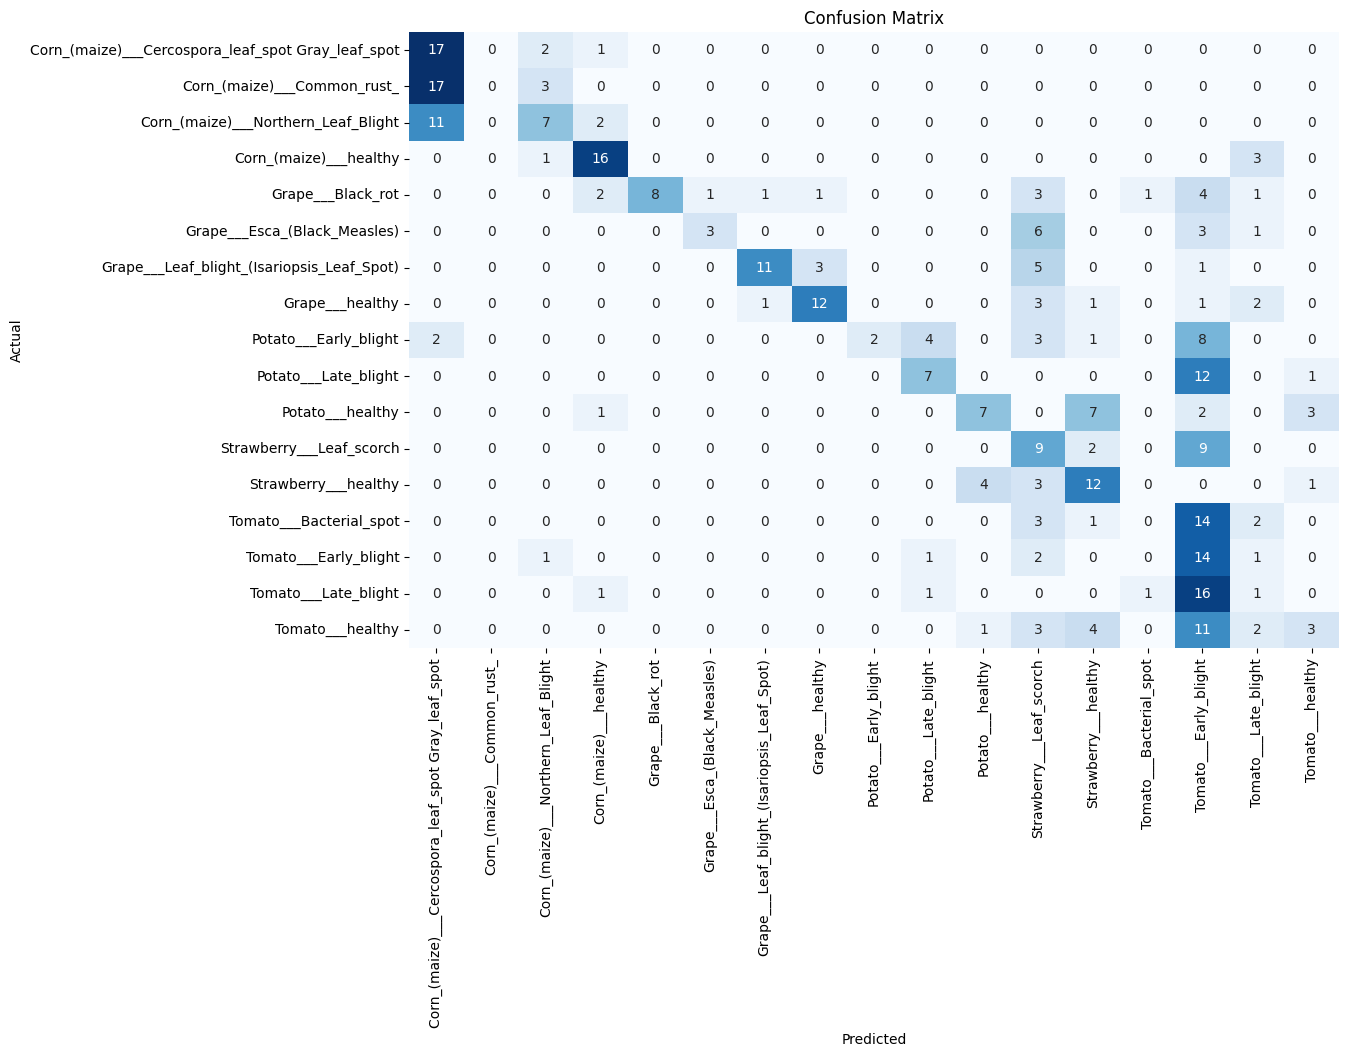

Classification Report:
----------------------
                                                     precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     0.3617    0.8500    0.5075        20
                       Corn_(maize)___Common_rust_     0.0000    0.0000    0.0000        20
               Corn_(maize)___Northern_Leaf_Blight     0.5000    0.3500    0.4118        20
                            Corn_(maize)___healthy     0.6957    0.8000    0.7442        20
                                 Grape___Black_rot     1.0000    0.3636    0.5333        22
                      Grape___Esca_(Black_Measles)     0.7500    0.2308    0.3529        13
        Grape___Leaf_blight_(Isariopsis_Leaf_Spot)     0.8462    0.5500    0.6667        20
                                   Grape___healthy     0.7500    0.6000    0.6667        20
                             Potato___Early_blight     1.0000    0.1000    0.1818        20
                              Po

C:\Users\ASUS LAPTOP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS LAPTOP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS LAPTOP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [ ]:
def predictor(test_gen):    
    y_pred = []
    error_list = []
    error_pred_list = []
    y_true = test_gen.labels
    classes = list(test_gen.class_indices.keys())
    class_count = len(classes)
    errors = 0
    preds = model.predict(test_gen, verbose=1)
    tests = len(preds)    
    for i, p in enumerate(preds):        
        pred_index = np.argmax(p)         
        true_index = test_gen.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors = errors + 1
            file = test_gen.filenames[i]
            error_list.append(file)
            error_class = classes[pred_index]
            error_pred_list.append(error_class)
        y_pred.append(pred_index)
            
    acc = (1 - errors/tests) * 100
    msg = f'There were {errors} errors in {tests} tests for an accuracy of {acc:.2f}'
    print(msg)
    
    ypred = np.array(y_pred)
    ytrue = np.array(y_true)
    f1score = f1_score(ytrue, ypred, average='weighted') * 100
    if class_count <= 30:
        cm = confusion_matrix(ytrue, ypred)
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count) + .5, classes, rotation=90)
        plt.yticks(np.arange(class_count) + .5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    
    clr = classification_report(y_true, y_pred, target_names=classes, digits=4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    
    return errors, tests, error_list, error_pred_list, f1score, y_pred, y_true

errors, tests, error_list, error_pred_list, f1score, y_pred, y_true = predictor(test_generator)

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('/nTest accuracy:', test_acc)
print('Test Loss:', test_loss)

22/22 - 26s - loss: 2.4136 - accuracy: 0.3817 - 26s/epoch - 1s/step
/nTest accuracy: 0.38165679574012756
Test Loss: 2.4136404991149902


<a id="effbuild"></a>
<h3><b>Building the EfficientNetB0 Model</b></h3>

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

In [ ]:
# Load EfficientNetB0 model without the top layer
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

fine_tune_at = 50  

# Freeze all layers up to the specified fine-tune starting point
for layer in efficientnet_model.layers[:fine_tune_at]:
    layer.trainable = False

# Create a new model with custom top layers
model = Sequential()
model.add(efficientnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))  # You can adjust the number of neurons as needed
model.add(Dense(17, activation='softmax'))  # num_classes is the number of disease classes
# Add a dropout layer with a dropout rate of 0.2 to prevent overfitting
model.add(layers.Dropout(0.2))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<a id="efftrain"></a>
<h3><b>Training of EfficientNetB0 Model</b></h3>

In [ ]:
# Define callbacks
checkpoint = ModelCheckpoint('plant_disease_detection_efficientNet.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)
# Save history object
with open('history[efficientnet2024b0].pkl', 'wb') as f:
    pickle.dump(history.history, f)
# Load history object
with open('history[efficientnet2024b0].pkl', 'rb') as f:
    loaded_history = pickle.load(f)

Epoch 1/20


796/796 [==============================] - ETA: 0s - loss: 3.7190 - accuracy: 0.6397
Epoch 1: val_accuracy improved from -inf to 0.45159, saving model to plant_disease_detection_efficientNet.h5


c:\Users\nehae\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


796/796 [==============================] - 1045s 1s/step - loss: 3.7190 - accuracy: 0.6397 - val_loss: 2.2924 - val_accuracy: 0.4516
Epoch 2/20
796/796 [==============================] - ETA: 0s - loss: 3.4363 - accuracy: 0.7191
Epoch 2: val_accuracy improved from 0.45159 to 0.55008, saving model to plant_disease_detection_efficientNet.h5
796/796 [==============================] - 1091s 1s/step - loss: 3.4363 - accuracy: 0.7191 - val_loss: 1.6398 - val_accuracy: 0.5501
Epoch 3/20
796/796 [==============================] - ETA: 0s - loss: 3.4698 - accuracy: 0.7278
Epoch 3: val_accuracy improved from 0.55008 to 0.88704, saving model to plant_disease_detection_efficientNet.h5
796/796 [==============================] - 948s 1s/step - loss: 3.4698 - accuracy: 0.7278 - val_loss: 0.3340 - val_accuracy: 0.8870
Epoch 4/20
796/796 [==============================] - ETA: 0s - loss: 3.4565 - accuracy: 0.7386
Epoch 4: val_accuracy did not improve from 0.88704
796/796 [==============================

<a id="effeval"></a>
<h3><b>Evaluation of EfficientNetB0 Model</b></h3>

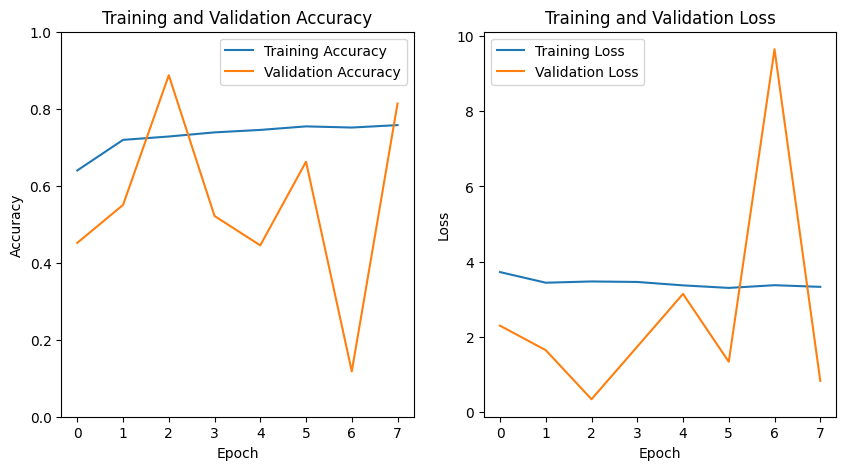

In [ ]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

22/22 [==============================] - 20s 581ms/step
There were 259 errors in 338 tests for an accuracy of 23.37


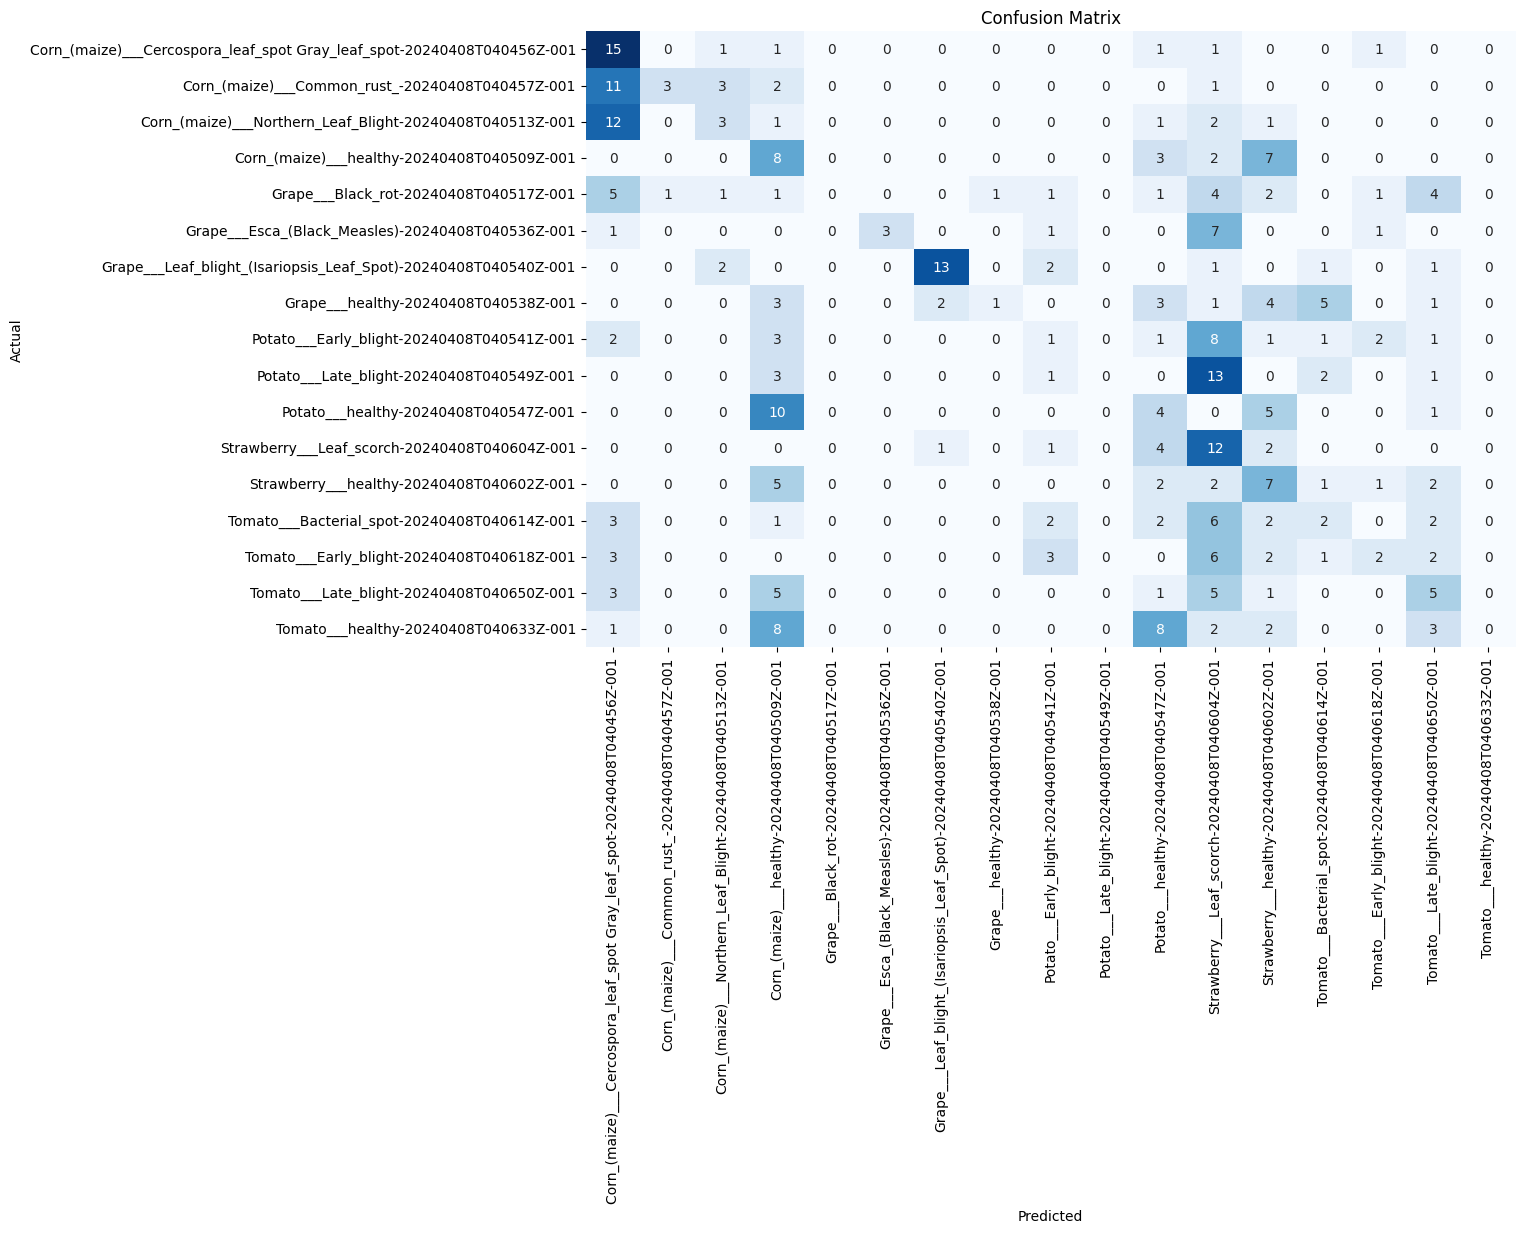

Classification Report:
----------------------
                                                                          precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot-20240408T040456Z-001     0.2679    0.7500    0.3947        20
                       Corn_(maize)___Common_rust_-20240408T040457Z-001     0.7500    0.1500    0.2500        20
               Corn_(maize)___Northern_Leaf_Blight-20240408T040513Z-001     0.3000    0.1500    0.2000        20
                            Corn_(maize)___healthy-20240408T040509Z-001     0.1569    0.4000    0.2254        20
                                 Grape___Black_rot-20240408T040517Z-001     0.0000    0.0000    0.0000        22
                      Grape___Esca_(Black_Measles)-20240408T040536Z-001     1.0000    0.2308    0.3750        13
        Grape___Leaf_blight_(Isariopsis_Leaf_Spot)-20240408T040540Z-001     0.8125    0.6500    0.7222        20
                                   Grape___healt

c:\Users\nehae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nehae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nehae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
def predictor(test_gen):    
    y_pred = []
    error_list = []
    error_pred_list = []
    y_true = test_gen.labels
    classes = list(test_gen.class_indices.keys())
    class_count = len(classes)
    errors = 0
    preds = model.predict(test_gen, verbose=1)
    tests = len(preds)    
    for i, p in enumerate(preds):        
        pred_index = np.argmax(p)         
        true_index = test_gen.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors = errors + 1
            file = test_gen.filenames[i]
            error_list.append(file)
            error_class = classes[pred_index]
            error_pred_list.append(error_class)
        y_pred.append(pred_index)
            
    acc = (1 - errors/tests) * 100
    msg = f'There were {errors} errors in {tests} tests for an accuracy of {acc:.2f}'
    print(msg)
    
    ypred = np.array(y_pred)
    ytrue = np.array(y_true)
    f1score = f1_score(ytrue, ypred, average='weighted') * 100
    if class_count <= 30:
        cm = confusion_matrix(ytrue, ypred)
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count) + .5, classes, rotation=90)
        plt.yticks(np.arange(class_count) + .5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    
    clr = classification_report(y_true, y_pred, target_names=classes, digits=4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    
    return errors, tests, error_list, error_pred_list, f1score, y_pred, y_true

errors, tests, error_list, error_pred_list, f1score, y_pred, y_true = predictor(test_generator)

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('/nTest accuracy:', test_acc)
print('Test Loss:', test_loss)


22/22 - 9s - loss: 5.9095 - accuracy: 0.2337 - 9s/epoch - 417ms/step
/nTest accuracy: 0.2337278127670288
Test Loss: 5.909483909606934


<a id="alexbuild"></a>
<h3><b>Building the AlexNet Model</b></h3>

In [ ]:
# Building the AlexNet Model
model = Sequential([
    Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(256, kernel_size=(5,5), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(384, kernel_size=(3,3), activation='relu'),
    Conv2D(384, kernel_size=(3,3), activation='relu'),
    Conv2D(256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 384)         1

<a id="alextrain"></a>
<h3><b>Training of AlexNet Model</b></h3>

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)

# Save history object
with open('history[alexnet(copy)2024].pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Load history object
with open('history[alexnet(copy)2024].pkl', 'rb') as f:
    loaded_history = pickle.load(f)

Epoch 1/20
796/796 [==============================] - ETA: 0s - loss: 2.5286 - accuracy: 0.1546
Epoch 1: val_accuracy improved from -inf to 0.23156, saving model to ../models\alexnet(copy)_plant_disease_detection.h5
796/796 [==============================] - 137s 163ms/step - loss: 2.5286 - accuracy: 0.1546 - val_loss: 2.2803 - val_accuracy: 0.2316
Epoch 2/20
796/796 [==============================] - ETA: 0s - loss: 2.0650 - accuracy: 0.2776
Epoch 2: val_accuracy improved from 0.23156 to 0.43724, saving model to ../models\alexnet(copy)_plant_disease_detection.h5
796/796 [==============================] - 127s 160ms/step - loss: 2.0650 - accuracy: 0.2776 - val_loss: 1.6753 - val_accuracy: 0.4372
Epoch 3/20
796/796 [==============================] - ETA: 0s - loss: 1.5878 - accuracy: 0.4421
Epoch 3: val_accuracy improved from 0.43724 to 0.55648, saving model to ../models\alexnet(copy)_plant_disease_detection.h5
796/796 [==============================] - 125s 157ms/step - loss: 1.5878 - 

<a id="alexeval"></a>
<h3><b>Evaluation of AlexNet Model</b></h3>

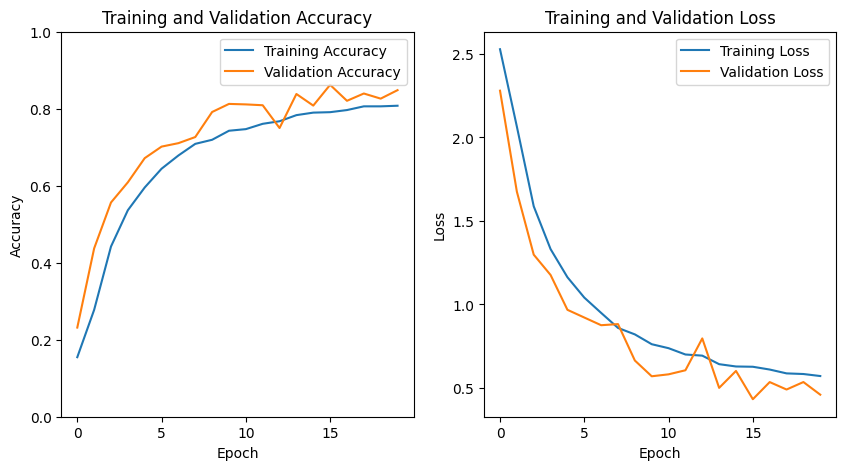

In [ ]:
# Evaluation of Model
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

30/30 [==============================] - 1s 43ms/step
There were 55 errors in 468 tests for an accuracy of 88.25


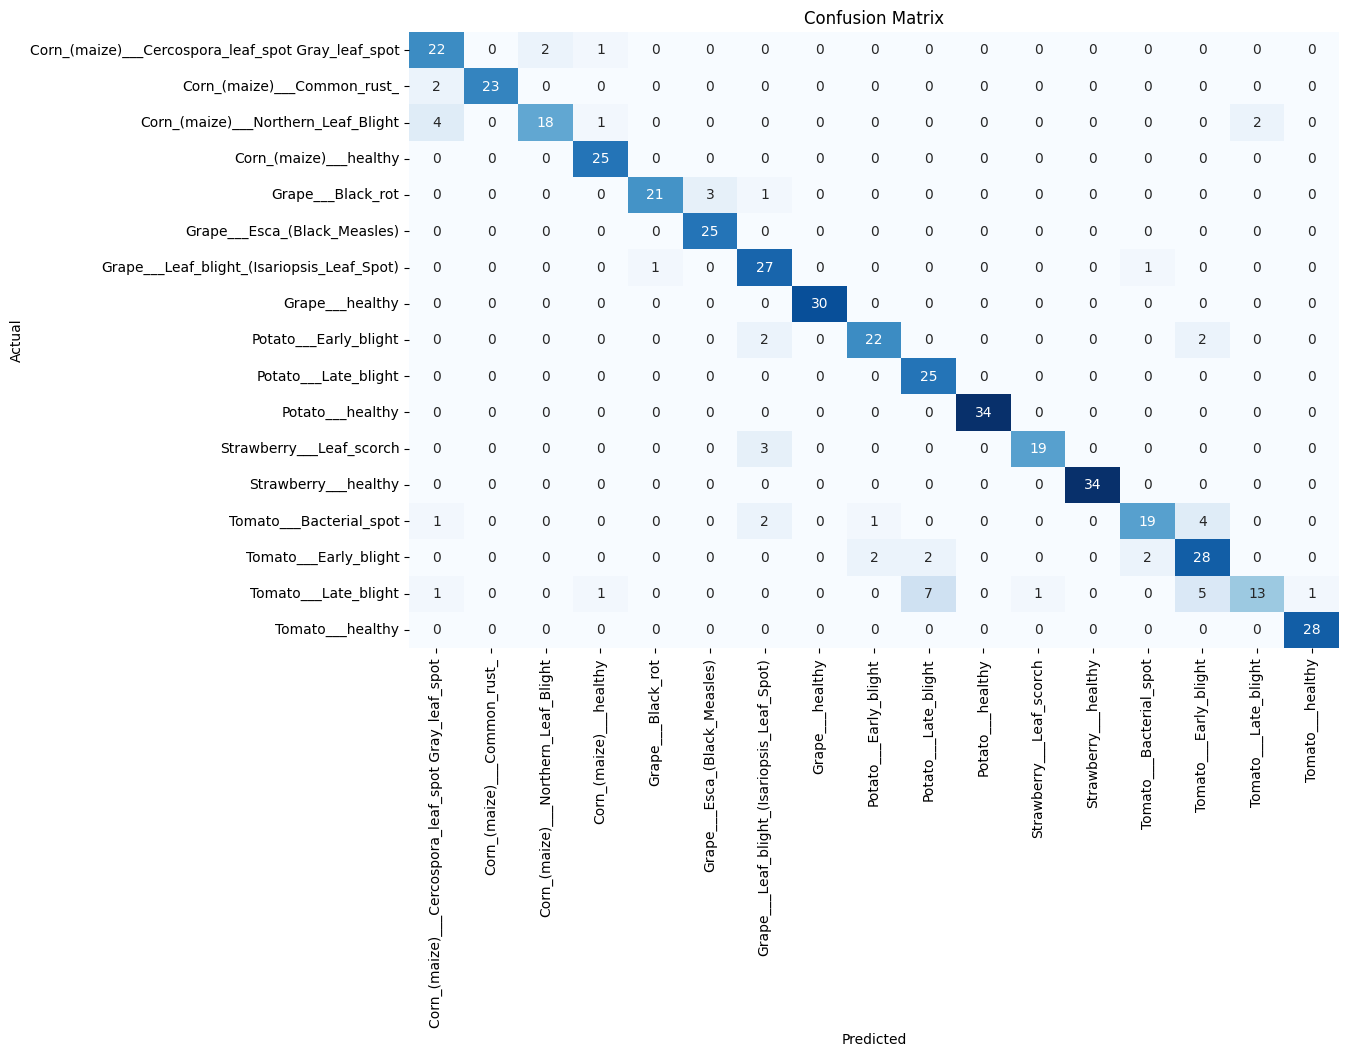

Classification Report:
----------------------
                                                     precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     0.7333    0.8800    0.8000        25
                       Corn_(maize)___Common_rust_     1.0000    0.9200    0.9583        25
               Corn_(maize)___Northern_Leaf_Blight     0.9000    0.7200    0.8000        25
                            Corn_(maize)___healthy     0.8929    1.0000    0.9434        25
                                 Grape___Black_rot     0.9545    0.8400    0.8936        25
                      Grape___Esca_(Black_Measles)     0.8929    1.0000    0.9434        25
        Grape___Leaf_blight_(Isariopsis_Leaf_Spot)     0.7714    0.9310    0.8438        29
                                   Grape___healthy     1.0000    1.0000    1.0000        30
                             Potato___Early_blight     0.8800    0.8462    0.8627        26
                              Po

In [ ]:
def predictor(test_gen):    
    y_pred = []
    error_list = []
    error_pred_list = []
    y_true = test_gen.labels
    classes = list(test_gen.class_indices.keys())
    class_count = len(classes)
    errors = 0
    preds = model.predict(test_gen, verbose=1)
    tests = len(preds)    
    for i, p in enumerate(preds):        
        pred_index = np.argmax(p)         
        true_index = test_gen.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors = errors + 1
            file = test_gen.filenames[i]
            error_list.append(file)
            error_class = classes[pred_index]
            error_pred_list.append(error_class)
        y_pred.append(pred_index)
            
    acc = (1 - errors/tests) * 100
    msg = f'There were {errors} errors in {tests} tests for an accuracy of {acc:.2f}'
    print(msg)
    
    ypred = np.array(y_pred)
    ytrue = np.array(y_true)
    f1score = f1_score(ytrue, ypred, average='weighted') * 100
    if class_count <= 30:
        cm = confusion_matrix(ytrue, ypred)
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count) + .5, classes, rotation=90)
        plt.yticks(np.arange(class_count) + .5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    
    clr = classification_report(y_true, y_pred, target_names=classes, digits=4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    
    return errors, tests, error_list, error_pred_list, f1score, y_pred, y_true

errors, tests, error_list, error_pred_list, f1score, y_pred, y_true = predictor(test_generator)

<center><a href="#toc">Back to ToC</a></center>